## data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_train

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51


In [3]:
df_test = pd.read_csv('./data/test.csv')
df_test

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15
...,...,...,...,...,...,...,...,...,...
478,TEST_478,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,4.207,306.443,2,1,7,4.207,55.13
479,TEST_479,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,-0.608,335.398,5,0,1,-1.736,70.16
480,TEST_480,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,1.792,349.383,3,1,3,1.792,69.72
481,TEST_481,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,0.790,341.132,3,2,2,0.423,69.64


In [4]:
df_sample = pd.read_csv('./data/sample_submission.csv')
df_sample

,id,MLM,HLM
0,TEST_000,0,0
1,TEST_001,0,0
2,TEST_002,0,0
3,TEST_003,0,0
4,TEST_004,0,0
...,...,...,...
478,TEST_478,0,0
479,TEST_479,0,0
480,TEST_480,0,0
481,TEST_481,0,0


In [5]:
# column 순서 조절 및 'id' drop
new_column_order = ['id', 'MLM', 'HLM', 'SMILES', 'AlogP', 'Molecular_Weight',
                    'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD',
                    'Molecular_PolarSurfaceArea']

df_train = df_train[new_column_order]
df_train = df_train.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

print(f'train size : {df_train.shape}')
df_train.head()

train size : (3498, 10)


,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5,2,8,3.259,117.37
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2,1,2,2.172,73.47
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5,0,3,1.585,62.45
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6,0,5,3.475,92.60
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3,0,1,2.337,42.43


In [6]:
# train data 같은 인풋 값 대비 다른 아웃풋 average로 변환
duplicated_rows = df_train[df_train.iloc[:, 2:].duplicated(keep=False)]
sorted_duplicates = duplicated_rows.sort_values(by='SMILES', ascending=False)
average_df = sorted_duplicates.groupby('SMILES').mean().reset_index()

# column 순서 조절
new_column_order = ['MLM', 'HLM', 'SMILES', 'AlogP', 'Molecular_Weight',
                    'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD',
                    'Molecular_PolarSurfaceArea']

average_df = average_df[new_column_order]
average_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,0.9225,28.0615,C(=C/c1nnn(Cc2ccccc2)n1)\c1ccccc1,3.556,262.309,3.0,0.0,4.0,3.556,43.60
1,62.2175,77.9110,CC(=O)Nc1ccc(N2N=C(c3ccc(O)cc3)C(C)CC2=O)cc1,2.172,337.372,4.0,2.0,3.0,2.169,82.00
2,68.6310,64.6690,CC(=O)Nc1nc2ccc(-c3nn(C(C)C)c4nc(N)ncc34)cc2s1,2.293,367.428,5.0,2.0,3.0,2.307,139.85
3,32.1435,85.6850,CC(C)(C)OC(=O)N1CCC(c2n[nH]c3nc(S(C)(=O)=O)ncc...,1.684,381.450,7.0,1.0,4.0,1.684,126.52
4,3.6870,43.3385,CC(C)COc1cc(=O)n2c(c1C(=O)N1CCC(C)CC1)CCCCC2,2.843,360.490,3.0,0.0,4.0,2.843,49.85
5,62.1085,68.1015,CC(C)NC(=O)c1c(Cl)nn(C)c1NC(=O)c1cc(Br)nn1-c1n...,3.750,501.165,5.0,2.0,5.0,3.750,106.72
6,43.1700,31.1300,CC1CC(=O)N(c2ccc(-c3cccc(C#N)c3)cc2)N=C1c1ccc(...,4.449,381.427,4.0,1.0,3.0,4.446,76.69
7,2.3395,36.8145,CCCCC/N=c1\n(C)c(=O)nc2sccn12,2.484,252.336,4.0,0.0,4.0,2.474,73.56
8,3.4420,3.6015,CCOC(=O)CC1(NC(=O)N2Cc3c(sc4c3CCCC4)-n3cccc3C2...,6.727,537.736,3.0,1.0,6.0,6.727,120.05
9,73.5450,1.1345,CCc1nc2cc(Br)c(C(=O)OC)nc2n1CC(=O)c1ccccc1,3.815,402.242,5.0,0.0,6.0,3.819,74.08


In [7]:
# 중복값 제거한 train unique value
unique_df = df_train[~df_train.iloc[:, 2:].duplicated(keep=False)]

# unique value 와 average value concat
df_train = pd.concat([unique_df, average_df])
df_train.reset_index(drop = True, inplace = True)
print(f'train size : {df_train.shape}')

df_train.head()

train size : (3471, 10)


,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43


In [8]:
print(f'test size : {df_test.shape}')
df_test.head()

test size : (483, 8)


,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76
1,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31
2,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86
3,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21
4,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15


### merge train and test data for feature engineering

In [9]:
df_total = pd.concat([df_train, df_test])
df_total = df_total.reset_index(drop = True)
df_total.head()

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43


In [10]:
# Alop 결측값 처리
df_total[df_total.AlogP.isna()]

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
2752,0.549,0.2,[H][C@]1(CC[C@@]2([H])[C@@H](C)C=CC3=C[C@H](C)...,NaN,418.566,5.0,1.0,7.0,4.634,72.83
3334,0.240,3.2,COc1cc2c(cc1OC)/C(=N\c1ccccc1)N(Cc1ccccc1F)CC2,NaN,390.450,3.0,0.0,5.0,4.911,34.06
3481,NaN,NaN,[H]C1(C(O)c2ccc3c(c2)OCO3)C(=O)Oc2cc(OC)ccc2C1...,NaN,404.412,6.0,1.0,4.0,3.942,74.22


In [11]:
# 결측치 LogD 값으로 대체 (corr = 0.96)
df_total['AlogP'].fillna(df_total['LogD'], inplace=True)
row_2752 = df_total.loc[[2752]]
row_3334 = df_total.loc[[3334]]
row_3481 = df_total.loc[[3481]]

missing_df = pd.concat([row_2752, row_3334, row_3481])
missing_df

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
2752,0.549,0.2,[H][C@]1(CC[C@@]2([H])[C@@H](C)C=CC3=C[C@H](C)...,4.634,418.566,5.0,1.0,7.0,4.634,72.83
3334,0.240,3.2,COc1cc2c(cc1OC)/C(=N\c1ccccc1)N(Cc1ccccc1F)CC2,4.911,390.450,3.0,0.0,5.0,4.911,34.06
3481,NaN,NaN,[H]C1(C(O)c2ccc3c(c2)OCO3)C(=O)Oc2cc(OC)ccc2C1...,3.942,404.412,6.0,1.0,4.0,3.942,74.22


In [12]:
df_total.isna().sum()

MLM                           483
HLM                           483
SMILES                          0
AlogP                           0
Molecular_Weight                0
Num_H_Acceptors                 0
Num_H_Donors                    0
Num_RotatableBonds              0
LogD                            0
Molecular_PolarSurfaceArea      0
dtype: int64

In [13]:
def resumetable(df):
    print(f'dataset size: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['data type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'feature'})
    summary['num of missing value'] = df.isnull().sum().values
    summary['num of unique value'] = df.nunique().values
    summary['First value'] = df.loc[0].values
    summary['Second value'] = df.loc[1].values
    summary['Third value'] = df.loc[2].values
    return summary

resumetable(df_total)

dataset size: (3954, 10)


,feature,data type,num of missing value,num of unique value,First value,Second value,Third value
0,MLM,float64,483,2720,26.01,29.27,5.586
1,HLM,float64,483,2766,50.68,50.59,80.892
2,SMILES,object,0,3954,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1
3,AlogP,float64,0,2837,3.259,2.169,1.593
4,Molecular_Weight,float64,0,3425,400.495,301.407,297.358
5,Num_H_Acceptors,float64,0,15,5.0,2.0,5.0
6,Num_H_Donors,float64,0,10,2.0,1.0,0.0
7,Num_RotatableBonds,float64,0,21,8.0,2.0,3.0
8,LogD,float64,0,2910,3.259,2.172,1.585
9,Molecular_PolarSurfaceArea,float64,0,2378,117.37,73.47,62.45


In [14]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole
from collections import Counter

def count_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        atom_symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
        atom_counts = dict(Counter(atom_symbols))
        return atom_counts
    else:
        return {}

df_total['Atom_Counts'] = df_total['SMILES'].apply(count_atoms)
atom_counts_df = pd.DataFrame(df_total['Atom_Counts'].tolist()).fillna(0).astype(int)
df_total = pd.concat([df_total, atom_counts_df], axis=1)
df_total = df_total.drop(columns=['Atom_Counts'])

df_total

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,C,O,N,S,F,Cl,Br,Se,I,P
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37,20,3,4,1,0,0,0,0,0,0
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47,16,1,3,1,0,0,0,0,0,0
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45,15,0,7,0,0,0,0,0,0,0
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60,26,2,6,1,0,0,0,0,0,0
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43,16,2,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,NaN,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,4.207,306.443,2.0,1.0,7.0,4.207,55.13,18,2,2,0,0,0,0,0,0,0
3950,NaN,NaN,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,-0.608,335.398,5.0,0.0,1.0,-1.736,70.16,17,4,3,0,0,0,0,0,0,0
3951,NaN,NaN,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,1.792,349.383,3.0,1.0,3.0,1.792,69.72,20,3,3,0,0,0,0,0,0,0
3952,NaN,NaN,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,0.790,341.132,3.0,2.0,2.0,0.423,69.64,13,3,2,0,1,0,1,0,0,0


In [15]:
def bond_frequency(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        bonds = mol.GetBonds()
        bond_counts = [bond.GetBondTypeAsDouble() for bond in bonds]
        bond_freq = dict(Counter(bond_counts))
        return bond_freq
    else:
        return {}

# dictionary 형태로 저장 및 pandas column 변환
df_total['Bond_Frequencies'] = df_total['SMILES'].apply(bond_frequency)
bond_freq_df = pd.DataFrame(df_total['Bond_Frequencies'].tolist()).fillna(0).astype(int)
df_total = pd.concat([df_total, bond_freq_df], axis=1)

# 추출한 특성 drop
df_total = df_total.drop(columns=['Bond_Frequencies'])

# 결합 column name 변경
new_column_names = {
    1.0: 'Bond_1.0',
    1.5: 'Bond_1.5',
    2.0: 'Bond_2.0',
    3.0: 'Bond_3.0'
}
df_total = df_total.rename(columns=new_column_names)

df_total

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,...,F,Cl,Br,Se,I,P,Bond_1.0,Bond_1.5,Bond_2.0,Bond_3.0
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37,...,0,0,0,0,0,0,13,16,1,0
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47,...,0,0,0,0,0,0,11,11,1,0
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45,...,0,0,0,0,0,0,10,15,0,0
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60,...,0,0,0,0,0,0,20,17,2,0
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43,...,0,0,0,0,0,0,9,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,NaN,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,4.207,306.443,2.0,1.0,7.0,4.207,55.13,...,0,0,0,0,0,0,17,5,1,0
3950,NaN,NaN,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,-0.608,335.398,5.0,0.0,1.0,-1.736,70.16,...,0,0,0,0,0,0,22,0,4,0
3951,NaN,NaN,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,1.792,349.383,3.0,1.0,3.0,1.792,69.72,...,0,0,0,0,0,0,14,12,3,0
3952,NaN,NaN,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,0.790,341.132,3.0,2.0,2.0,0.423,69.64,...,1,0,1,0,0,0,7,12,2,0


## 특성 공학 추가

In [16]:
# target(MLM, HLM) 100 이상의 이상치 제거
df_total[(df_total['HLM'] > 100) | (df_total['MLM'] > 100)]

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,...,F,Cl,Br,Se,I,P,Bond_1.0,Bond_1.5,Bond_2.0,Bond_3.0
651,131.720,99.570,O=C(Nc1ccccc1)C1CCCN1C1=NS(=O)(=O)c2ccccc21,1.412,355.411,4.0,1.0,3.0,1.412,87.22,...,0,0,0,0,0,0,12,12,4,0
1076,3.820,106.510,COc1c(NC(=O)c2ccc[nH]2)cc(Cl)cc1C(=O)N(C)C,2.061,321.759,3.0,2.0,4.0,2.061,74.43,...,0,1,0,0,0,0,10,11,2,0
1564,1.745,135.336,CN(C)S(=O)(=O)CCNCc1ccc(-c2ccccc2)cc1,2.075,318.434,3.0,1.0,7.0,2.052,57.79,...,0,0,0,0,0,0,9,12,2,0
2373,86.878,107.323,CC(C)CCC1CCN(C(=O)C2CC(O)CN2)CC1,1.345,268.395,3.0,2.0,4.0,0.139,52.57,...,0,0,0,0,0,0,19,0,1,0
2546,98.550,103.720,Cc1nc(-c2c[nH]c(C(=O)N3CCOc4cc(F)ccc43)c2)cs1,2.876,343.375,3.0,1.0,2.0,3.032,86.46,...,1,0,0,0,0,0,10,16,1,0
2899,101.380,52.330,CCCC(=O)Nc1cc(C(=O)NC2CCCCC2)ccc1S(=O)(=O)c1cc...,4.906,462.989,4.0,2.0,7.0,4.906,100.72,...,0,1,0,0,0,0,17,12,4,0
3107,52.847,103.907,CN1C(=O)c2cccc3c2C1=Cc1ccc2ccccc2c1O3,3.319,299.323,2.0,0.0,0.0,3.319,29.54,...,0,0,0,0,0,0,8,17,2,0
3350,8.890,100.830,c1cnc2c(C3NCCc4c3[nH]c3ccccc43)cccc2c1,3.719,299.369,2.0,2.0,1.0,3.719,40.71,...,0,0,0,0,0,0,6,21,0,0


In [17]:
df_total = df_total[~((df_total['HLM'] > 100) | (df_total['MLM'] > 100))]
df_total

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,...,F,Cl,Br,Se,I,P,Bond_1.0,Bond_1.5,Bond_2.0,Bond_3.0
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37,...,0,0,0,0,0,0,13,16,1,0
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47,...,0,0,0,0,0,0,11,11,1,0
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45,...,0,0,0,0,0,0,10,15,0,0
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60,...,0,0,0,0,0,0,20,17,2,0
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43,...,0,0,0,0,0,0,9,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,NaN,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,4.207,306.443,2.0,1.0,7.0,4.207,55.13,...,0,0,0,0,0,0,17,5,1,0
3950,NaN,NaN,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,-0.608,335.398,5.0,0.0,1.0,-1.736,70.16,...,0,0,0,0,0,0,22,0,4,0
3951,NaN,NaN,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,1.792,349.383,3.0,1.0,3.0,1.792,69.72,...,0,0,0,0,0,0,14,12,3,0
3952,NaN,NaN,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,0.790,341.132,3.0,2.0,2.0,0.423,69.64,...,1,0,1,0,0,0,7,12,2,0


In [18]:
df_polar_over200 = df_total[df_total.Molecular_PolarSurfaceArea >= 200]
df_polar_over200

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,...,F,Cl,Br,Se,I,P,Bond_1.0,Bond_1.5,Bond_2.0,Bond_3.0
177,62.030,50.590,CCC(CN1CCN(C)CC1)NC(=O)Cc1csc(Nc2ccccc2F)n1,-4.137,597.656,11.0,6.0,13.0,-4.241,220.86,...,1,0,0,0,0,0,18,11,1,0
1156,99.900,99.900,COC(=O)c1cc(F)c(NCCCN(CCCCN(CCCn2c(=O)[nH]c3cc...,8.241,1360.467,15.0,5.0,38.0,8.257,296.43,...,5,0,0,0,0,0,62,28,10,0
1222,69.077,48.075,c1ccc(-c2cc(CNCC3COCCO3)c3nnnn3c2)cc1,-3.761,517.489,13.0,5.0,10.0,-4.920,205.69,...,0,0,0,0,0,0,11,16,0,0
1864,94.200,62.300,O=C([O-])CN1C(=O)S/C(=C\C=C2\SCCN2CCCS(=O)(=O)...,-2.191,422.520,9.0,0.0,7.0,-2.189,211.95,...,0,0,0,0,0,0,19,0,7,0
2669,40.761,51.084,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,8.163,1115.264,10.0,6.0,24.0,8.156,229.23,...,1,0,0,0,0,0,19,23,2,0
3196,88.310,81.100,Oc1cc(O)c2c(c1)O[C@H](c1ccc(O)c(O)c1)[C@H](O)[...,3.565,578.520,12.0,10.0,3.0,2.406,220.75,...,0,0,0,0,0,0,23,24,0,0
3500,NaN,NaN,COc1nc2cc(C)ccc2cc1CN(C)C1(C)CCS(=O)(=O)C1,-1.542,540.583,12.0,4.0,9.0,-2.371,200.00,...,0,0,0,0,0,0,13,11,2,0


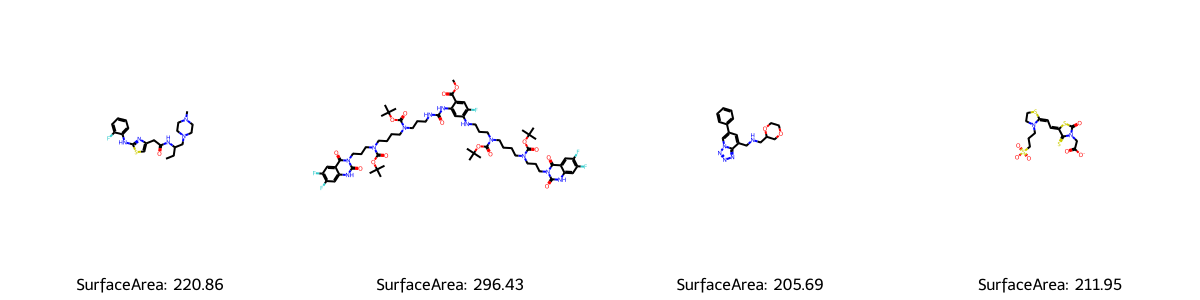

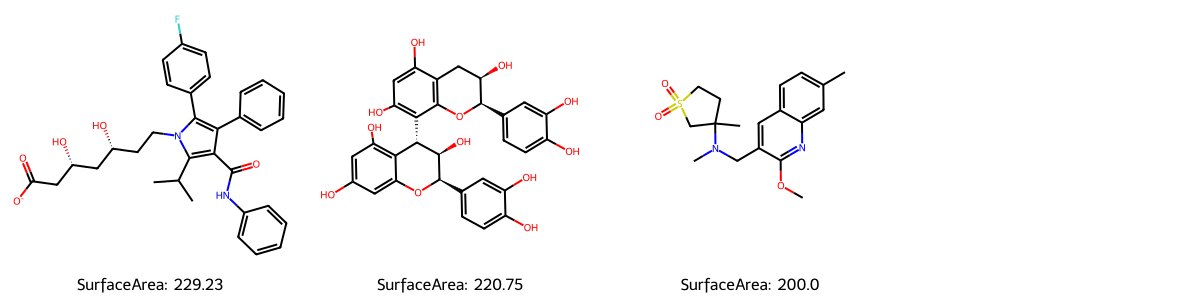

In [19]:
# 200을 초과하는 값이 이상치가 아닌것으로 판단됨

from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole

def show_smiles(smiles):
  data_smiles = smiles['SMILES']
  # Convert the SMILES strings to RDKit molecules
  molecules = [Chem.MolFromSmiles(smile) for smile in data_smiles]

  # Draw the first molecules
  img_4 = Draw.MolsToGridImage(molecules[:4], molsPerRow=4, subImgSize=(300,300),
                            legends=[f'SurfaceArea: {round(x, 3)}' for x in smiles['Molecular_PolarSurfaceArea'].iloc[:4]], 
                            returnPNG=False)
  
  img_3 = Draw.MolsToGridImage(molecules[4:], molsPerRow=4, subImgSize=(300,300),
                            legends=[f'SurfaceArea: {round(x, 3)}' for x in smiles['Molecular_PolarSurfaceArea'].iloc[4:]], 
                            returnPNG=False)
                             
  from IPython.display import display, Image
  display(img_4)
  display(img_3)

show_smiles(df_polar_over200)

In [20]:
bins = [0, 200, 400, 600, df_train['Molecular_Weight'].max()]
labels = [1, 2, 3, 4]
df_total['Molecular_Weight_Bins'] = pd.cut(df_total['Molecular_Weight'], bins=bins, labels=labels)

# Display the first few rows of the dataframe to check the new column
df_total[['Molecular_Weight', 'Molecular_Weight_Bins']].head()

,Molecular_Weight,Molecular_Weight_Bins
0,400.495,3
1,301.407,2
2,297.358,2
3,494.652,3
4,268.310,2


In [21]:
df_total['H_Acceptors_x_H_Donors'] = df_total['Num_H_Acceptors'] * df_total['Num_H_Donors']
df_total[['Num_H_Acceptors', 'Num_H_Donors', 'H_Acceptors_x_H_Donors']].head()

,Num_H_Acceptors,Num_H_Donors,H_Acceptors_x_H_Donors
0,5.0,2.0,10.0
1,2.0,1.0,2.0
2,5.0,0.0,0.0
3,6.0,0.0,0.0
4,3.0,0.0,0.0


In [22]:
df_total['AlogP^2'] = df_total['AlogP'] * df_total['AlogP']
df_total['LogD^2'] = df_total['LogD'] * df_total['LogD']
df_total['Alog_LogD'] = df_total['AlogP'] * df_total['LogD']
df_total

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,...,P,Bond_1.0,Bond_1.5,Bond_2.0,Bond_3.0,Molecular_Weight_Bins,H_Acceptors_x_H_Donors,AlogP^2,LogD^2,Alog_LogD
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5.0,2.0,8.0,3.259,117.37,...,0,13,16,1,0,3,10.0,10.621081,10.621081,10.621081
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2.0,1.0,2.0,2.172,73.47,...,0,11,11,1,0,2,2.0,4.704561,4.717584,4.711068
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5.0,0.0,3.0,1.585,62.45,...,0,10,15,0,0,2,0.0,2.537649,2.512225,2.524905
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6.0,0.0,5.0,3.475,92.60,...,0,20,17,2,0,3,0.0,22.762441,12.075625,16.579225
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3.0,0.0,1.0,2.337,42.43,...,0,9,12,1,0,2,0.0,5.452225,5.461569,5.456895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,NaN,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,4.207,306.443,2.0,1.0,7.0,4.207,55.13,...,0,17,5,1,0,2,2.0,17.698849,17.698849,17.698849
3950,NaN,NaN,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,-0.608,335.398,5.0,0.0,1.0,-1.736,70.16,...,0,22,0,4,0,2,0.0,0.369664,3.013696,1.055488
3951,NaN,NaN,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,1.792,349.383,3.0,1.0,3.0,1.792,69.72,...,0,14,12,3,0,2,3.0,3.211264,3.211264,3.211264
3952,NaN,NaN,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,0.790,341.132,3.0,2.0,2.0,0.423,69.64,...,0,7,12,2,0,2,6.0,0.624100,0.178929,0.334170


In [23]:
df_total['SMILES_Length'] = df_total['SMILES'].apply(len)
df_total[['SMILES', 'SMILES_Length']].head()

,SMILES,SMILES_Length
0,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,47
1,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,36
2,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,32
3,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,63
4,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,35


## 데이터 나누기 + study 횟수

In [24]:
df_total['Molecular_Weight_Bins'] = df_total['Molecular_Weight_Bins'].astype('int32')
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 0 to 3953
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MLM                         3463 non-null   float64
 1   HLM                         3463 non-null   float64
 2   SMILES                      3946 non-null   object 
 3   AlogP                       3946 non-null   float64
 4   Molecular_Weight            3946 non-null   float64
 5   Num_H_Acceptors             3946 non-null   float64
 6   Num_H_Donors                3946 non-null   float64
 7   Num_RotatableBonds          3946 non-null   float64
 8   LogD                        3946 non-null   float64
 9   Molecular_PolarSurfaceArea  3946 non-null   float64
 10  C                           3946 non-null   int32  
 11  O                           3946 non-null   int32  
 12  N                           3946 non-null   int32  
 13  S                           3946 

In [25]:
dataframe_number = len(df_train) - 8

In [26]:
df_train = df_total.iloc[:dataframe_number, :].copy()
df_train.reset_index(drop = True, inplace = True)
df_train.drop(['SMILES','MLM', 'HLM'], axis=1, inplace = True)
df_train

,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,C,O,N,...,Bond_1.0,Bond_1.5,Bond_2.0,Bond_3.0,Molecular_Weight_Bins,H_Acceptors_x_H_Donors,AlogP^2,LogD^2,Alog_LogD,SMILES_Length
0,3.259,400.495,5.0,2.0,8.0,3.259,117.37,20,3,4,...,13,16,1,0,3,10.0,10.621081,10.621081,10.621081,47
1,2.169,301.407,2.0,1.0,2.0,2.172,73.47,16,1,3,...,11,11,1,0,2,2.0,4.704561,4.717584,4.711068,36
2,1.593,297.358,5.0,0.0,3.0,1.585,62.45,15,0,7,...,10,15,0,0,2,0.0,2.537649,2.512225,2.524905,32
3,4.771,494.652,6.0,0.0,5.0,3.475,92.60,26,2,6,...,20,17,2,0,3,0.0,22.762441,12.075625,16.579225,63
4,2.335,268.310,3.0,0.0,1.0,2.337,42.43,16,2,2,...,9,12,1,0,2,0.0,5.452225,5.461569,5.456895,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,4.282,553.480,5.0,0.0,7.0,4.009,65.98,29,3,4,...,22,18,2,0,3,0.0,18.335524,16.072081,17.166538,69
3459,4.304,459.520,6.0,1.0,4.0,4.304,113.53,24,3,5,...,7,27,3,0,3,6.0,18.524416,18.524416,18.524416,60
3460,-1.133,385.417,7.0,0.0,4.0,-1.133,108.65,19,4,5,...,22,6,2,1,2,0.0,1.283689,1.283689,1.283689,47
3461,-0.533,302.289,6.0,1.0,2.0,-0.533,111.44,13,3,6,...,15,6,2,1,2,6.0,0.284089,0.284089,0.284089,35


In [27]:
df_test = df_total.iloc[dataframe_number:, :].copy()
df_test.reset_index(drop = True, inplace = True)
df_test.drop(['SMILES','MLM', 'HLM'], axis=1, inplace = True)
df_test

,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,C,O,N,...,Bond_1.0,Bond_1.5,Bond_2.0,Bond_3.0,Molecular_Weight_Bins,H_Acceptors_x_H_Donors,AlogP^2,LogD^2,Alog_LogD,SMILES_Length
0,2.641,361.505,4.0,2.0,7.0,2.635,92.76,18,1,5,...,16,11,0,0,2,8.0,6.974881,6.943225,6.959035,39
1,0.585,370.399,5.0,0.0,3.0,0.585,68.31,20,5,2,...,16,12,2,0,2,0.0,0.342225,0.342225,0.342225,46
2,4.276,347.414,4.0,4.0,5.0,4.290,92.86,20,1,5,...,8,18,2,0,2,16.0,18.284176,18.404100,18.344040,49
3,1.795,345.358,5.0,0.0,2.0,1.795,81.21,18,1,7,...,8,21,1,0,2,0.0,3.222025,3.222025,3.222025,42
4,1.219,353.418,4.0,0.0,2.0,0.169,61.15,19,2,5,...,12,15,2,0,2,0.0,1.485961,0.028561,0.206011,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,4.207,306.443,2.0,1.0,7.0,4.207,55.13,18,2,2,...,17,5,1,0,2,2.0,17.698849,17.698849,17.698849,33
479,-0.608,335.398,5.0,0.0,1.0,-1.736,70.16,17,4,3,...,22,0,4,0,2,0.0,0.369664,3.013696,1.055488,46
480,1.792,349.383,3.0,1.0,3.0,1.792,69.72,20,3,3,...,14,12,3,0,2,3.0,3.211264,3.211264,3.211264,45
481,0.790,341.132,3.0,2.0,2.0,0.423,69.64,13,3,2,...,7,12,2,0,2,6.0,0.624100,0.178929,0.334170,37


In [28]:
df_train_target = df_total[['MLM', 'HLM']].copy()
df_train_target.dropna(inplace = True)
df_train_target.reset_index(drop = True, inplace = True)
df_train_target

,MLM,HLM
0,26.0100,50.680
1,29.2700,50.590
2,5.5860,80.892
3,5.7100,2.000
4,93.2700,99.990
...,...,...
3458,56.0435,66.126
3459,56.3130,63.732
3460,70.2150,93.840
3461,56.6085,49.519


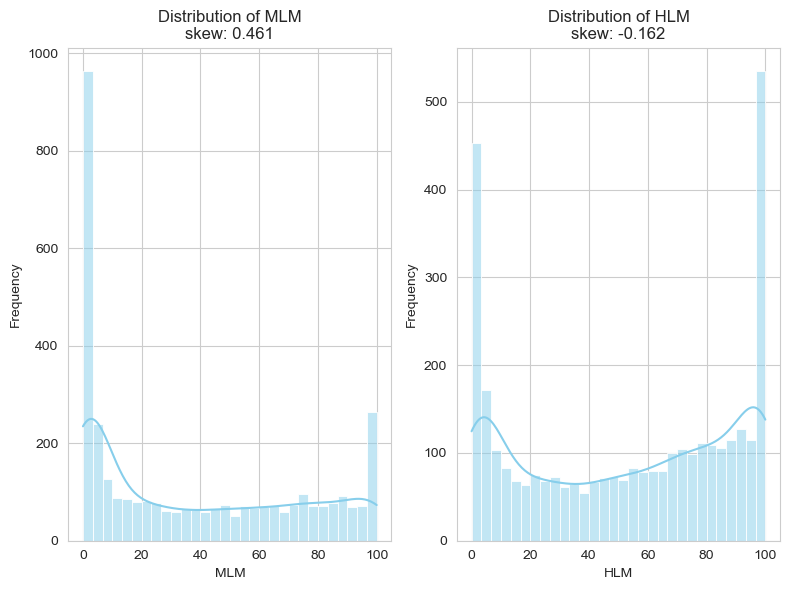

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

numerical_columns = ['MLM', 'HLM']

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df_train_target[col], bins=30, color='skyblue', kde=True)
    plt.title(f'Distribution of {col}\nskew: {round(df_train_target[col].skew(),3)}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [30]:
# Target 로그 변환 / 변환전후 비교 필요
# df_train_target['MLM'] = np.log1p(df_train_target['MLM'])
# df_train_target['HLM'] = np.log1p(df_train_target['HLM'])
# df_train_target

In [31]:
# sns.set_style("whitegrid")
# plt.figure(figsize=(8, 6))

# numerical_columns = ['MLM', 'HLM']

# for i, col in enumerate(numerical_columns, 1):
#     plt.subplot(1, 2, i)
#     sns.histplot(df_train_target[col], bins=30, color='skyblue', kde=True)
#     plt.title(f'Distribution of {col}\nskew: {round(df_train_target[col].skew(),3)}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

In [32]:
# optuna study
num_of_study = 4000

### target MLM

In [33]:
df_train_target_MLM = df_train_target['MLM']
df_train_target_MLM

0       26.0100
1       29.2700
2        5.5860
3        5.7100
4       93.2700
         ...   
3458    56.0435
3459    56.3130
3460    70.2150
3461    56.6085
3462     6.1730
Name: MLM, Length: 3463, dtype: float64

In [34]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import optuna
from sklearn.model_selection import train_test_split

def objective(trial):

    X_train, X_valid, y_train, y_valid = train_test_split(df_train, df_train_target_MLM, test_size = 0.2, random_state=42)

    param = {
        # constant
        'eval_metric': 'rmse',
        'random_state': 10,
        'n_estimators': 3000,
        'early_stopping_rounds': 300,
        'n_jobs': -1,
        # log_uniform
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-2, 100.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-2, 100.0),
        # suggest_discrete_uniform
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
        'learning_rate': trial.suggest_discrete_uniform('learning_rate', 0.001, 0.003, 0.001),
        # suggest_int
        'max_depth': trial.suggest_int('max_depth', 3, 10, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }
    model = XGBRegressor(**param)  
    model.fit(X_train, y_train, eval_set=[(X_valid,y_valid)], verbose=False)
    preds = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, preds, squared=False)
    
    return rmse

In [35]:
study = optuna.create_study(direction='minimize', study_name=None)
with tqdm(total=num_of_study) as pbar:  
    def callback(study, trial):
        pbar.update(1)
    
    study.optimize(objective, n_trials=num_of_study, callbacks=[callback])

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-09-08 22:05:48,297] A new study created in memory with name: no-name-e35c0e23-5297-472e-982b-e622eff8df5f
100%|██████████| 300/300 [14:04<00:00,  2.81s/it]

Number of finished trials: 300
Best trial: {'reg_alpha': 0.2378699570053151, 'reg_lambda': 0.02006805381565828, 'colsample_bytree': 0.95, 'subsample': 0.5, 'learning_rate': 0.002, 'max_depth': 6, 'min_child_weight': 2}


In [58]:
study.trials_dataframe().head()

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_learning_rate,params_max_depth,params_min_child_weight,params_reg_alpha,params_reg_lambda,params_subsample,state
0,0,31.904086,2023-09-08 22:21:15.864820,2023-09-08 22:21:18.980026,0 days 00:00:03.115206,0.80,0.002,7,2,0.934177,0.425792,0.90,COMPLETE
1,1,31.854454,2023-09-08 22:21:18.981026,2023-09-08 22:21:22.734873,0 days 00:00:03.753847,0.85,0.001,5,9,1.276424,0.212869,0.95,COMPLETE
2,2,32.154873,2023-09-08 22:21:22.736873,2023-09-08 22:21:26.848801,0 days 00:00:04.111928,0.90,0.002,10,7,8.173871,0.311980,0.80,COMPLETE
3,3,31.820929,2023-09-08 22:21:26.851802,2023-09-08 22:21:28.755734,0 days 00:00:01.903932,0.85,0.003,4,4,0.012518,2.095624,0.95,COMPLETE
4,4,32.118598,2023-09-08 22:21:28.756734,2023-09-08 22:21:30.915221,0 days 00:00:02.158487,0.60,0.003,10,10,0.108224,11.190999,0.50,COMPLETE


In [ ]:
df_study = study.trials_dataframe()

study_cols = ['params_colsample_bytree', 'params_learning_rate', 'params_max_depth',
       'params_min_child_weight', 'params_reg_alpha', 'params_reg_lambda',
       'params_subsample']

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

for i, col in enumerate(study_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_study[col], bins=30, color='skyblue', kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [37]:
optuna.visualization.plot_optimization_history(study)

In [38]:
optuna.visualization.plot_param_importances(study)

In [39]:
params=study.best_params
params['eval_metric'] = 'rmse'
params['early_stopping_rounds'] = 300
params['random_state'] = 10
params['n_estimators'] = 3000
params['n_jobs'] = -1

params

{'reg_alpha': 0.2378699570053151,
 'reg_lambda': 0.02006805381565828,
 'colsample_bytree': 0.95,
 'subsample': 0.5,
 'learning_rate': 0.002,
 'max_depth': 6,
 'min_child_weight': 2,
 'eval_metric': 'rmse',
 'early_stopping_rounds': 300,
 'random_state': 10,
 'n_estimators': 3000,
 'n_jobs': -1}

In [40]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=20, random_state=42, shuffle=True)
preds_MLM = np.zeros(df_test.shape[0])
rmse=[]
n=0

for trn_idx, test_idx in kf.split(df_train, df_train_target_MLM):
    X_tr, X_val=df_train.iloc[trn_idx], df_train.iloc[test_idx]
    y_tr, y_val=df_train_target_MLM.iloc[trn_idx], df_train_target_MLM.iloc[test_idx]

    model = XGBRegressor(**params)
    model.fit(X_tr, y_tr, eval_set=[(X_val,y_val)], verbose=False)

    preds_MLM+=model.predict(df_test)/kf.n_splits
    rmse.append(mean_squared_error(y_val, model.predict(X_val), squared=False))
    print(f'trial {n+1}:', round(rmse[n], 5))
    # print(f'trial {n+1}:', np.expm1(round(rmse[n], 10)))

    n+=1

MLM_cv = round(np.mean(rmse), 5)
print(f'\naverage: {MLM_cv}')

trial 1: 31.09473
trial 2: 29.5601
trial 3: 32.02389
trial 4: 27.94915
trial 5: 30.95219
trial 6: 31.00016
trial 7: 30.90329
trial 8: 29.6524
trial 9: 30.54875
trial 10: 33.9751
trial 11: 28.64855
trial 12: 28.63357
trial 13: 30.00315
trial 14: 31.4418
trial 15: 32.14697
trial 16: 32.27489
trial 17: 31.6275
trial 18: 31.33579
trial 19: 35.11592
trial 20: 30.91994

average: 30.99039


### target HLM

In [41]:
df_train_target_HLM = df_train_target['HLM']
df_train_target_HLM

0       50.680
1       50.590
2       80.892
3        2.000
4       99.990
         ...  
3458    66.126
3459    63.732
3460    93.840
3461    49.519
3462    10.867
Name: HLM, Length: 3463, dtype: float64

In [42]:
def objective(trial):

    X_train, X_valid, y_train, y_valid = train_test_split(df_train, df_train_target_HLM, test_size = 0.2, random_state=42)

    param = {
        # constant
        'eval_metric': 'rmse',
        'random_state': 10,
        'n_estimators': 3000,
        'early_stopping_rounds': 300,
        'n_jobs': -1,
        # log_uniform
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-2, 1e+4),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-2, 1e+4),
        # suggest_discrete_uniform
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1.0, 0.05),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1.0, 0.05),
        'learning_rate': trial.suggest_discrete_uniform('learning_rate', 0.001, 0.003, 0.001),
        # suggest_int
        'max_depth': trial.suggest_int('max_depth', 3, 10, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }
    model = XGBRegressor(**param)  
    model.fit(X_train, y_train, eval_set=[(X_valid,y_valid)], verbose=False)
    preds = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, preds, squared=False)
    
    return rmse

In [43]:
study = optuna.create_study(direction='minimize', study_name=None)
with tqdm(total=num_of_study) as pbar:  
    def callback(study, trial):
        pbar.update(1)  
    
    study.optimize(objective, n_trials=num_of_study, callbacks=[callback])

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-09-08 22:21:15,861] A new study created in memory with name: no-name-3d0fda0e-fc38-4a33-831d-4e3bc4dab862
100%|██████████| 300/300 [13:07<00:00,  2.63s/it]

Number of finished trials: 300
Best trial: {'reg_alpha': 0.08366792672304948, 'reg_lambda': 0.020423444719778236, 'colsample_bytree': 0.6, 'subsample': 0.65, 'learning_rate': 0.002, 'max_depth': 6, 'min_child_weight': 3}


In [59]:
study.trials_dataframe().head()

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_learning_rate,params_max_depth,params_min_child_weight,params_reg_alpha,params_reg_lambda,params_subsample,state
0,0,31.904086,2023-09-08 22:21:15.864820,2023-09-08 22:21:18.980026,0 days 00:00:03.115206,0.80,0.002,7,2,0.934177,0.425792,0.90,COMPLETE
1,1,31.854454,2023-09-08 22:21:18.981026,2023-09-08 22:21:22.734873,0 days 00:00:03.753847,0.85,0.001,5,9,1.276424,0.212869,0.95,COMPLETE
2,2,32.154873,2023-09-08 22:21:22.736873,2023-09-08 22:21:26.848801,0 days 00:00:04.111928,0.90,0.002,10,7,8.173871,0.311980,0.80,COMPLETE
3,3,31.820929,2023-09-08 22:21:26.851802,2023-09-08 22:21:28.755734,0 days 00:00:01.903932,0.85,0.003,4,4,0.012518,2.095624,0.95,COMPLETE
4,4,32.118598,2023-09-08 22:21:28.756734,2023-09-08 22:21:30.915221,0 days 00:00:02.158487,0.60,0.003,10,10,0.108224,11.190999,0.50,COMPLETE


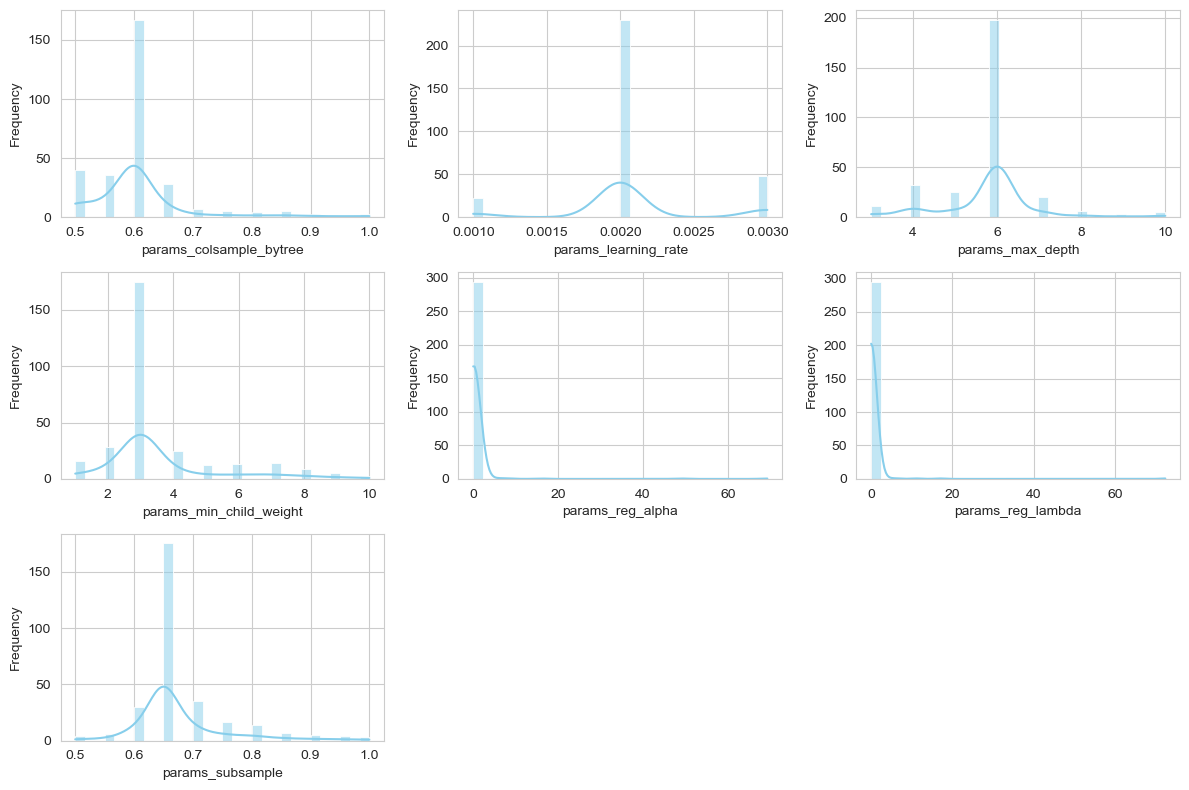

In [57]:
df_study = study.trials_dataframe()

study_cols = ['params_colsample_bytree', 'params_learning_rate', 'params_max_depth',
       'params_min_child_weight', 'params_reg_alpha', 'params_reg_lambda',
       'params_subsample']

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

for i, col in enumerate(study_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_study[col], bins=30, color='skyblue', kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [45]:
optuna.visualization.plot_optimization_history(study)

In [46]:
optuna.visualization.plot_param_importances(study)

In [47]:
params=study.best_params
params['eval_metric'] = 'rmse'
params['early_stopping_rounds'] = 300
params['random_state'] = 10
params['n_estimators'] = 3000
params['n_jobs'] = -1

params

{'reg_alpha': 0.08366792672304948,
 'reg_lambda': 0.020423444719778236,
 'colsample_bytree': 0.6,
 'subsample': 0.65,
 'learning_rate': 0.002,
 'max_depth': 6,
 'min_child_weight': 3,
 'eval_metric': 'rmse',
 'early_stopping_rounds': 300,
 'random_state': 10,
 'n_estimators': 3000,
 'n_jobs': -1}

In [48]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=20, random_state=42, shuffle=True)
preds_HLM = np.zeros(df_test.shape[0])
rmse=[]
n=0

for trn_idx, test_idx in kf.split(df_train, df_train_target_HLM):
    X_tr, X_val=df_train.iloc[trn_idx], df_train.iloc[test_idx]
    y_tr, y_val=df_train_target_HLM.iloc[trn_idx], df_train_target_HLM.iloc[test_idx]

    model = XGBRegressor(**params)
    model.fit(X_tr, y_tr, eval_set=[(X_val,y_val)], verbose= False)

    preds_HLM+=model.predict(df_test)/kf.n_splits
    rmse.append(mean_squared_error(y_val, model.predict(X_val), squared=False))
    print(f'trial {n+1}:', round(rmse[n], 10))
    # print(f'trial {n+1}:', np.expm1(round(rmse[n], 10)))

    n+=1

HLM_cv = round(np.mean(rmse), 5)
print(f'\naverage: {HLM_cv}')

trial 1: 31.8941204814
trial 2: 30.081532574
trial 3: 31.8468575039
trial 4: 31.8090158375
trial 5: 31.2753251329
trial 6: 30.9892622282
trial 7: 33.3026601287
trial 8: 31.0070193669
trial 9: 32.7233908448
trial 10: 32.7038620932
trial 11: 31.8285679469
trial 12: 28.9955551693
trial 13: 28.943892233
trial 14: 33.6733180554
trial 15: 32.6208261593
trial 16: 31.7213156415
trial 17: 32.1499825346
trial 18: 33.0092304672
trial 19: 34.1506806475
trial 20: 33.1246228673

average: 31.89255


## export csv

In [49]:
# 로그 변환 후 역변환
# df_sample['MLM'] = np.expm1(preds_MLM)
# df_sample['HLM'] = np.expm1(preds_HLM)

df_sample['MLM'] = preds_MLM
df_sample['HLM'] = preds_HLM

cv = round((MLM_cv + MLM_cv) / 2, 3)

df_sample.to_csv(f"./submission/submission_04_nolog_study4000_{cv}.csv", index = False, encoding = "utf-8-sig")

In [50]:
df_sample

,id,MLM,HLM
0,TEST_000,20.953448,43.677584
1,TEST_001,61.456756,72.094782
2,TEST_002,38.529023,53.450239
3,TEST_003,51.372991,71.792487
4,TEST_004,67.627332,77.954707
...,...,...,...
478,TEST_478,7.401514,28.155895
479,TEST_479,75.279391,80.921074
480,TEST_480,40.811535,65.317995
481,TEST_481,61.842435,71.697254
